In [1]:
import SimDAT2D.SimDAT2D_MDK as sim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import IsoDAT2D.IsoDAT2D_MDK as iso
from PIL import Image
import pyFAI, fabio
from pyFAI.gui import jupyter
import pyFAI
import os
import matplotlib.pyplot as plt
from tifffile import imread
from SimDAT2D import masking
import pyFAI.azimuthalIntegrator as AI
from scipy.ndimage import shift
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [2]:
# to reload iterative changes to the code, uncomment the following lines
import importlib
pd = importlib.reload(sim)

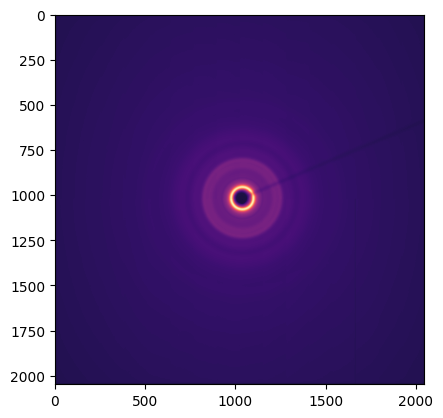

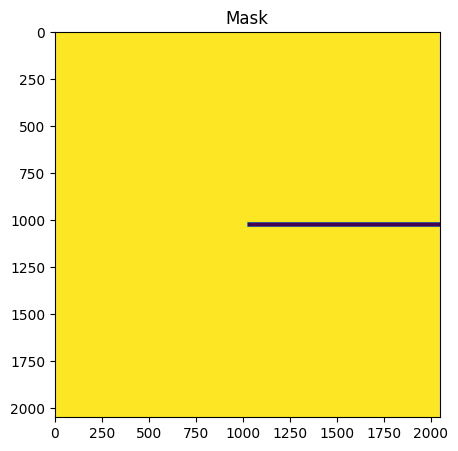

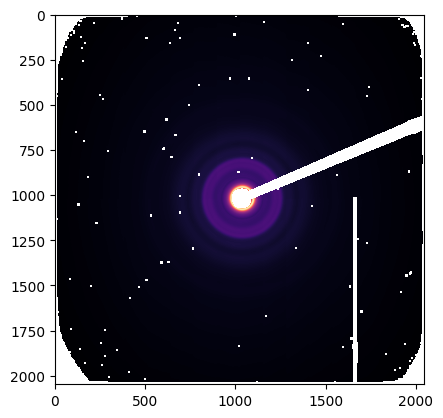

Found NaN values in original image, replacing with 0
Cleaned image:
Shape: (2048, 2048)
Min value: 0.0
Max value: 12681062.0
Number of non-zero pixels: 3996053

Shifted image:
Shape: (2048, 2048)
Min value: 0.0
Max value: 12681062.0
Number of non-zero pixels: 3995326


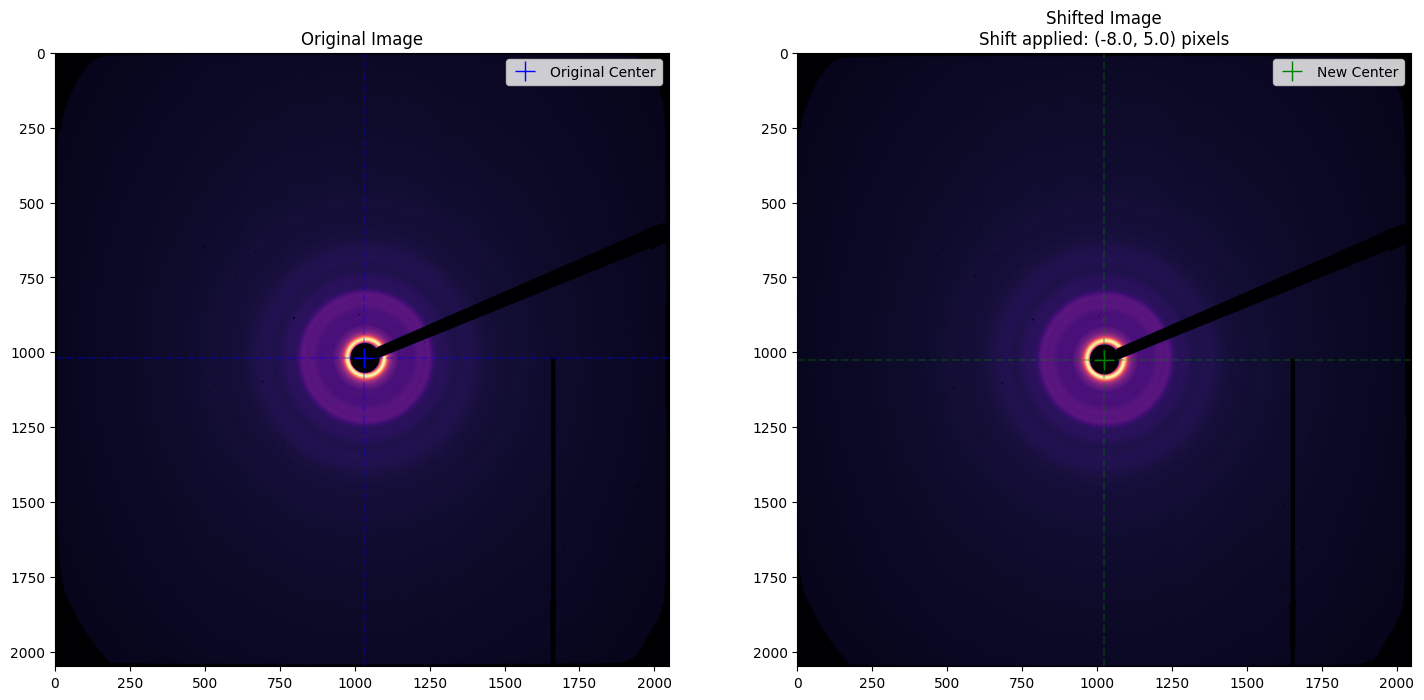

Shift applied: dx=-8.0, dy=5.0 pixels
(2048, 2048)


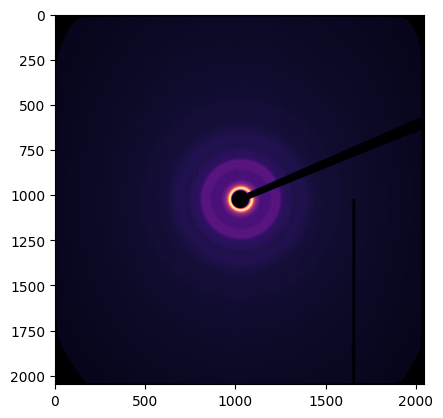

(2048, 2048)


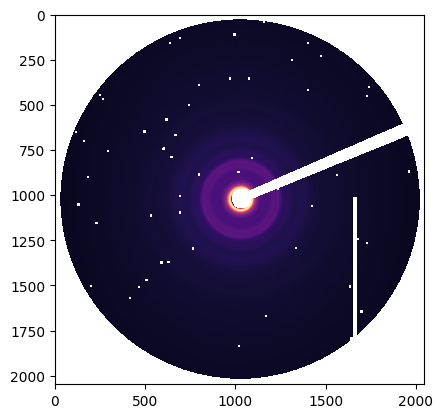

(2048, 2048)
(2048, 2048)


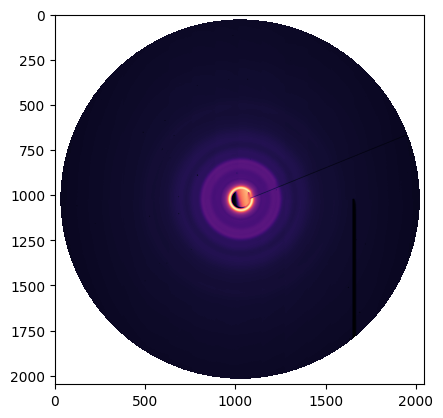

(2048, 2048)


In [3]:
tm_mask_path = r'C:\Users\kelleymarisa\UFL Dropbox\Marisa Kelley\DNA&MDKShare\copy_data_isodat\perkin\masks\tm_mask_whole.npy'
tm_mask = np.load(tm_mask_path)
tm_inverted_mask = 1 - tm_mask
plt.imshow(tm_inverted_mask, cmap = 'magma')

tm_cryst_C_GST_SiO2 = r'C:\Users\kelleymarisa\UFL Dropbox\Marisa Kelley\DNA&MDKShare\copy_data_isodat\perkin\da_8_cryst_C_GST_SiO2-00008\da_8_cryst_C_GST_SiO2-00008.tiff'
tm_cryst_C_GST_SiO2_image = imread(tm_cryst_C_GST_SiO2)
plt.imshow(tm_cryst_C_GST_SiO2_image, cmap = 'magma')
plt.show()

#create integration mask
mask_12 = sim.create_mask_for_tiff(tm_cryst_C_GST_SiO2, 12)

tm_mask_with_nan = tm_inverted_mask.astype(float)
tm_mask_with_nan[tm_inverted_mask == 0] = np.nan
plt.imshow(tm_mask_with_nan, cmap = 'magma')

tm_combined_image = tm_cryst_C_GST_SiO2_image + tm_mask_with_nan
plt.imshow(tm_combined_image, cmap = 'magma')
plt.show() 

# Define current beam center
current_center = (1032, 1019)  
# Apply the shift
tm_shifted_image, shift_applied = sim.center_shift_image(image=tm_combined_image, current_center=current_center, target_center=(1024, 1024))
print(tm_combined_image.shape)
plt.imshow(tm_shifted_image, cmap = 'magma')
plt.show()

print(tm_shifted_image.shape)
tm_shifted_image_masked = tm_shifted_image + tm_mask_with_nan
tm_circle = sim.mask_circle_nan_edge(tm_shifted_image_masked, radius = 1000, center = (1024, 1024))
plt.imshow(tm_circle, cmap = 'magma')
plt.show()
print(tm_circle.shape)

print(tm_shifted_image.shape)
tm_shifted_image_masked = tm_shifted_image + tm_mask_with_nan
tm_circle_filled = sim.fill_nan_with_neighbor_mean_circle(tm_shifted_image_masked, radius = 1000, center = (1024, 1024))
plt.imshow(tm_circle_filled, cmap = 'magma')
plt.show()
print(tm_circle_filled.shape)

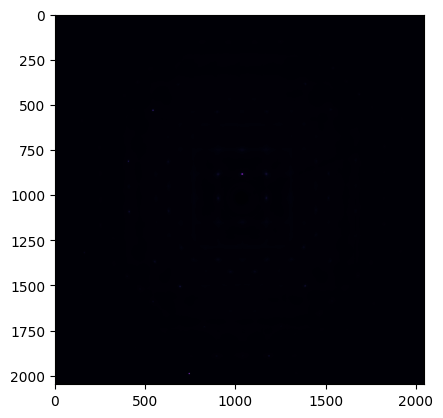

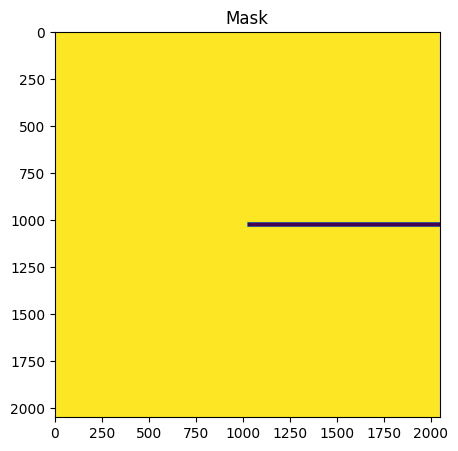

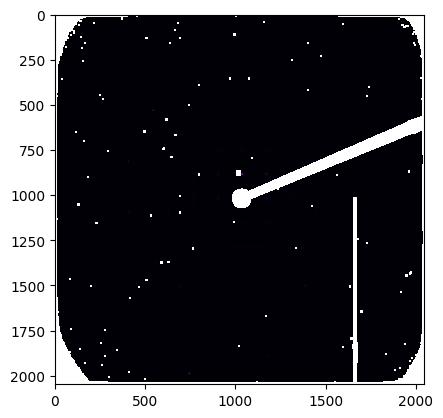

Found NaN values in original image, replacing with 0
Cleaned image:
Shape: (2048, 2048)
Min value: -158509.0
Max value: 89801305.0
Number of non-zero pixels: 3995593

Shifted image:
Shape: (2048, 2048)
Min value: -158509.0
Max value: 89801305.0
Number of non-zero pixels: 3994866


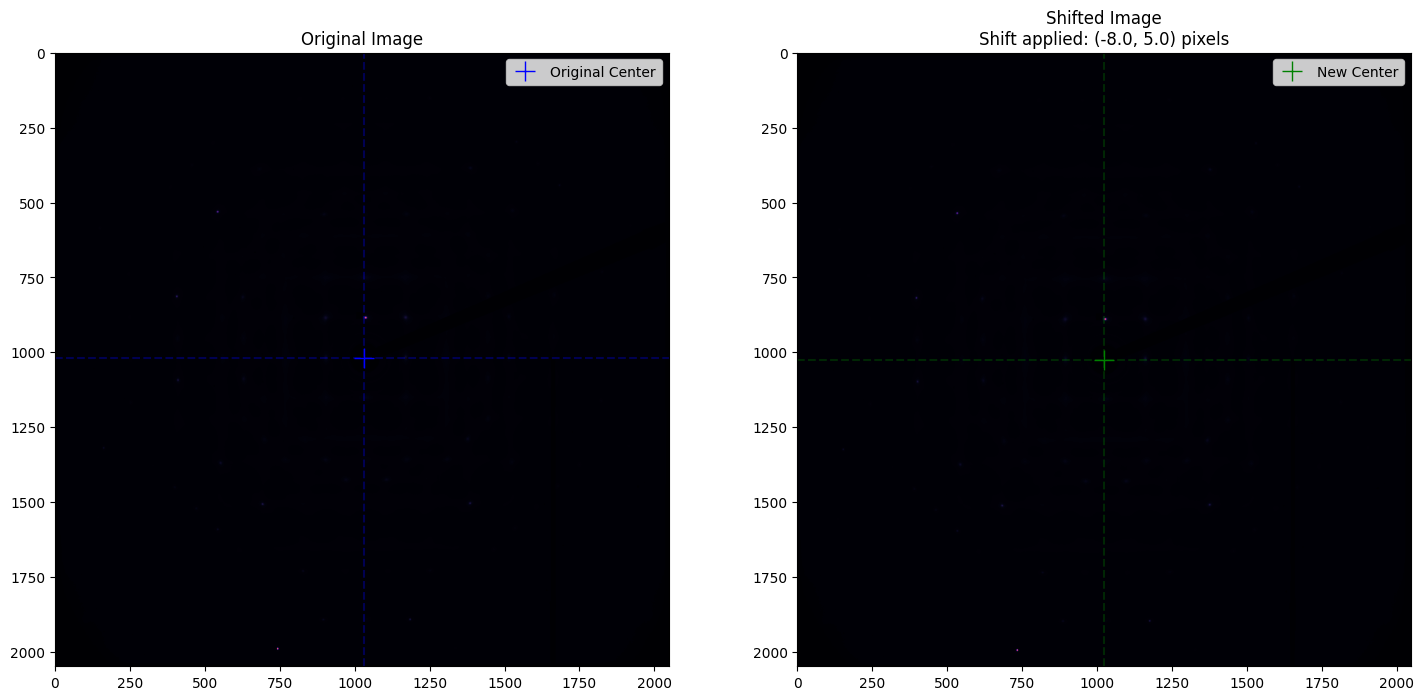

Shift applied: dx=-8.0, dy=5.0 pixels
(2048, 2048)


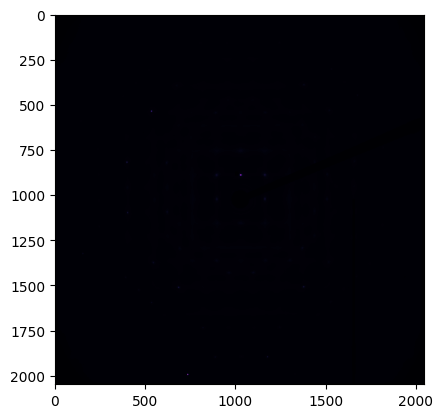

(2048, 2048)


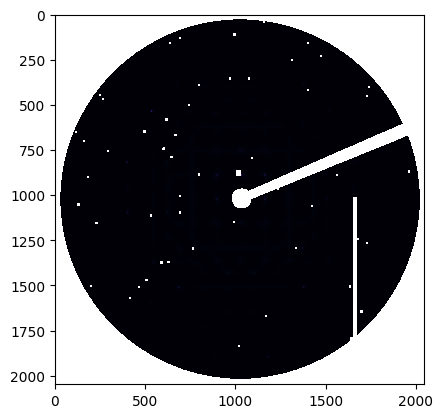

(2048, 2048)
(2048, 2048)


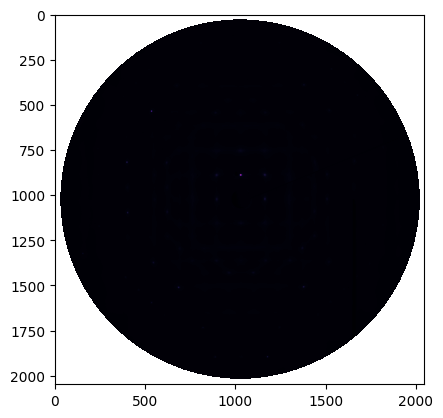

(2048, 2048)


In [4]:
tm_masksc_path = r'C:\Users\kelleymarisa\UFL Dropbox\Marisa Kelley\DNA&MDKShare\copy_data_isodat\perkin\masks\tm_mask_sc.npy'
tm_mask_sc = np.load(tm_masksc_path)
tm_inverted_mask_sc = 1 - tm_mask_sc
plt.imshow(tm_inverted_mask_sc, cmap = 'magma')

tm_cryst_C_GST_Si = r'C:\Users\kelleymarisa\UFL Dropbox\Marisa Kelley\DNA&MDKShare\copy_data_isodat\perkin\da_2_cryst_C_GST_Si-00002\da_2_cryst_C_GST_Si-00002.tiff'
tm_cryst_C_GST_Si_image = imread(tm_cryst_C_GST_Si)
plt.imshow(tm_cryst_C_GST_Si_image, cmap = 'magma')
plt.show()

#create integration mask
mask_12 = sim.create_mask_for_tiff(tm_cryst_C_GST_Si, 12)

tm_mask_with_nan = tm_inverted_mask_sc.astype(float)
tm_mask_with_nan[tm_inverted_mask_sc == 0] = np.nan
plt.imshow(tm_mask_with_nan, cmap = 'magma')

tm_combined_image_sc = tm_cryst_C_GST_Si_image + tm_mask_with_nan
plt.imshow(tm_combined_image_sc, cmap = 'magma')
plt.show() 

# Define current beam center
current_center = (1032, 1019)  
# Apply the shift
tm_shifted_image_sc, shift_applied_sc = sim.center_shift_image(image=tm_combined_image_sc, current_center=current_center, target_center=(1024, 1024))
print(tm_combined_image_sc.shape)
plt.imshow(tm_shifted_image_sc, cmap = 'magma')
plt.show()

print(tm_shifted_image_sc.shape)
tm_shifted_image_masked_sc = tm_shifted_image_sc + + tm_mask_with_nan
tm_circle_sc = sim.mask_circle_nan_edge(tm_shifted_image_masked_sc, radius = 1000, center = (1024, 1024))
plt.imshow(tm_circle_sc, cmap = 'magma')
plt.show()
print(tm_circle_sc.shape)

print(tm_shifted_image.shape)
tm_shifted_image_masked_sc = tm_shifted_image_sc + + tm_mask_with_nan
tm_circle_filled_sc = sim.fill_nan_with_neighbor_mean_circle(tm_shifted_image_masked_sc, radius = 1000, center = (1024, 1024))
plt.imshow(tm_circle_filled_sc, cmap = 'magma')
plt.show()
print(tm_circle_filled_sc.shape)

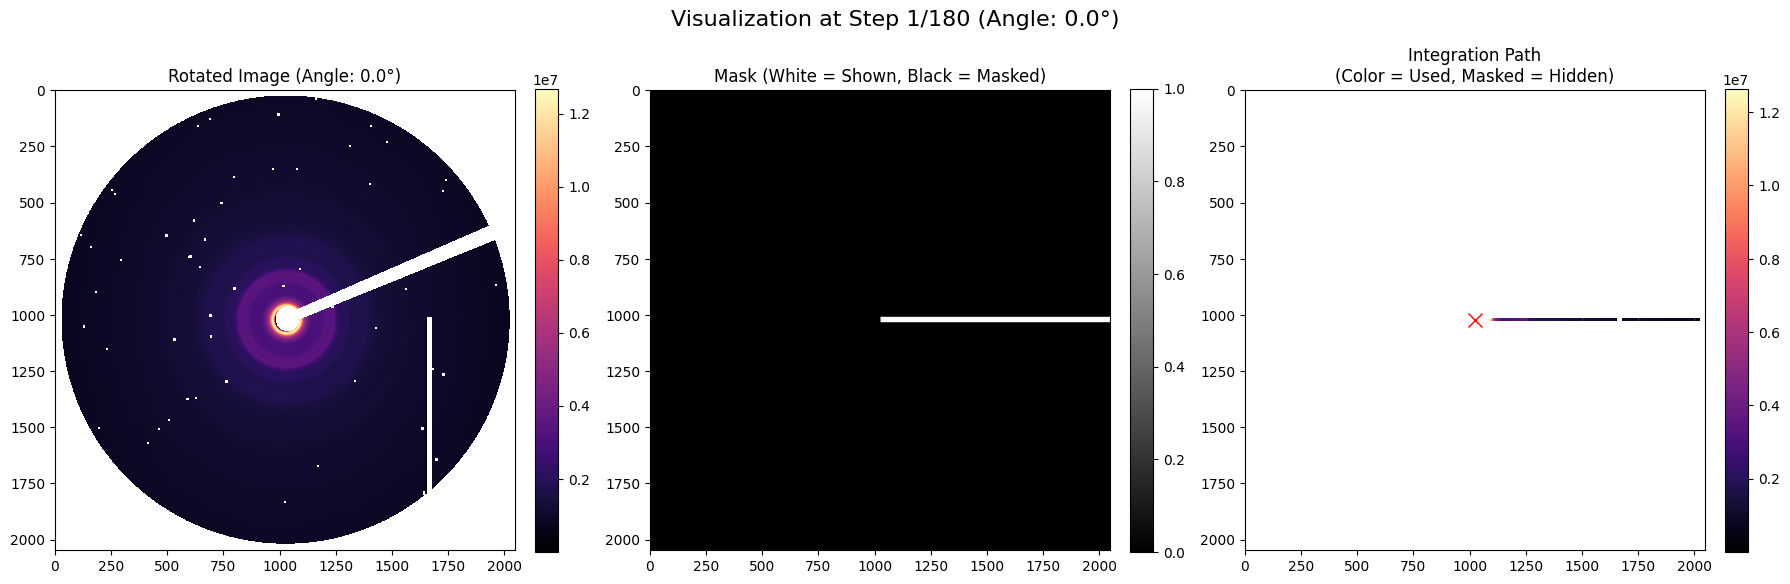

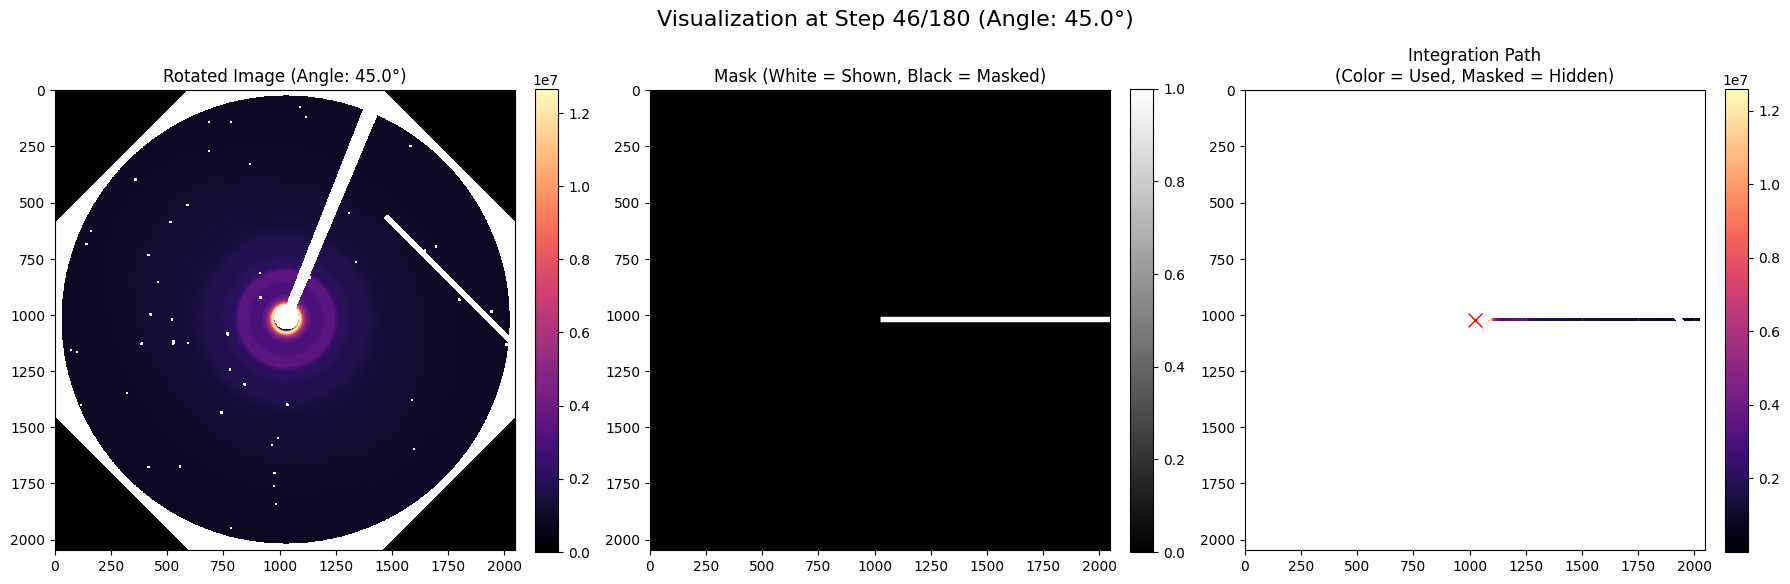

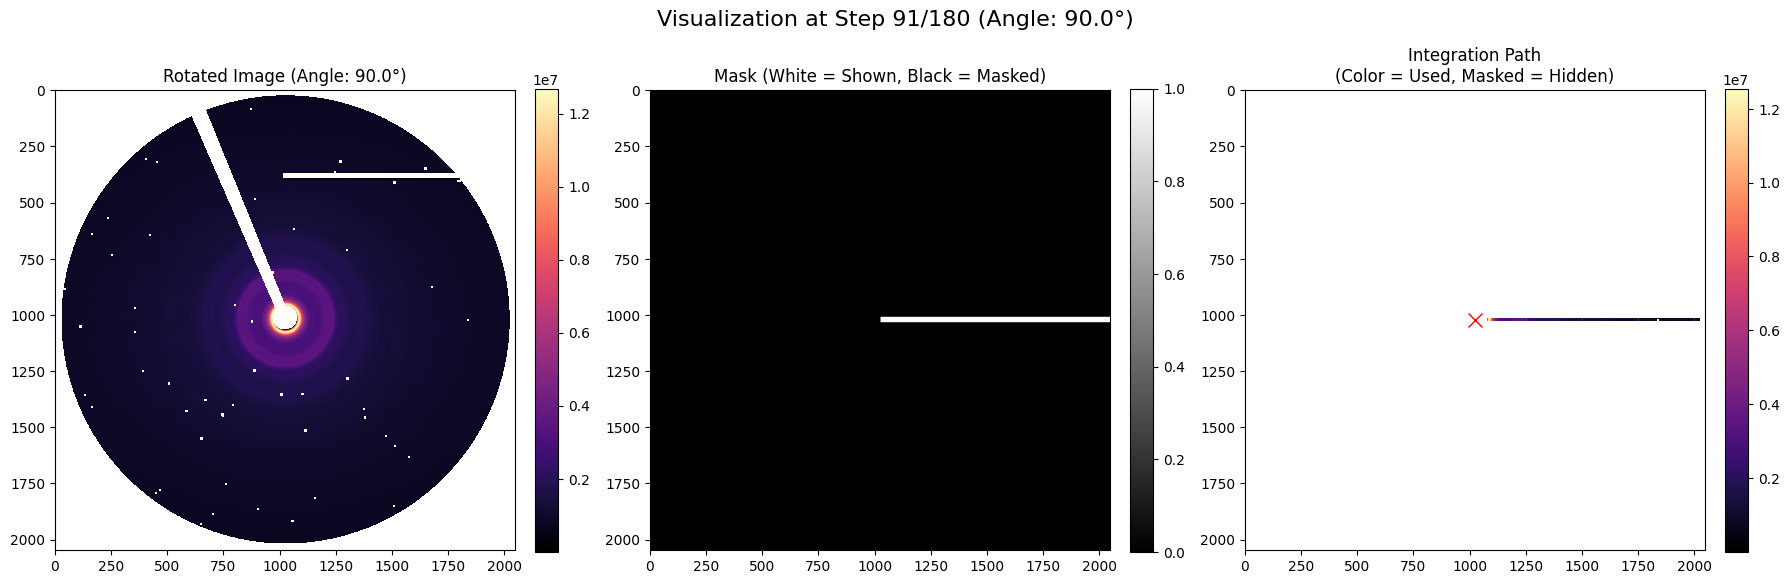

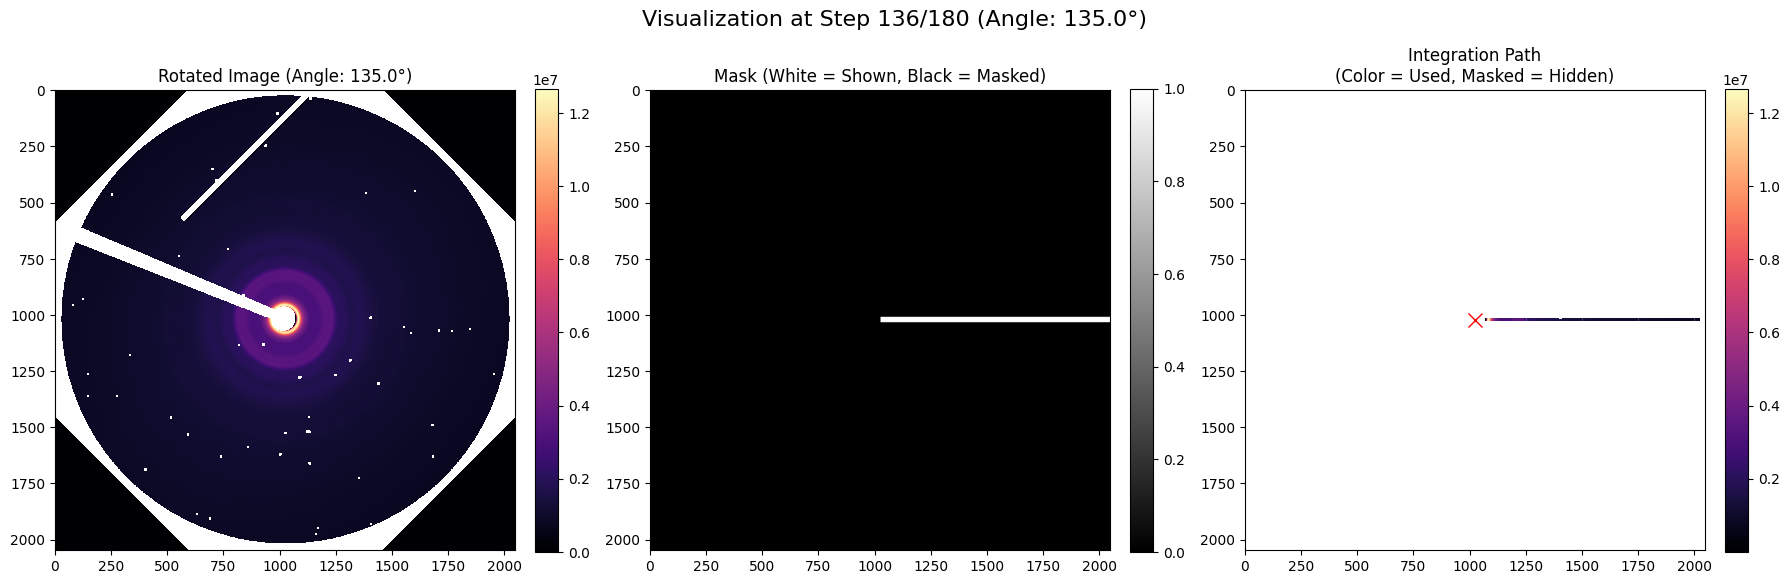

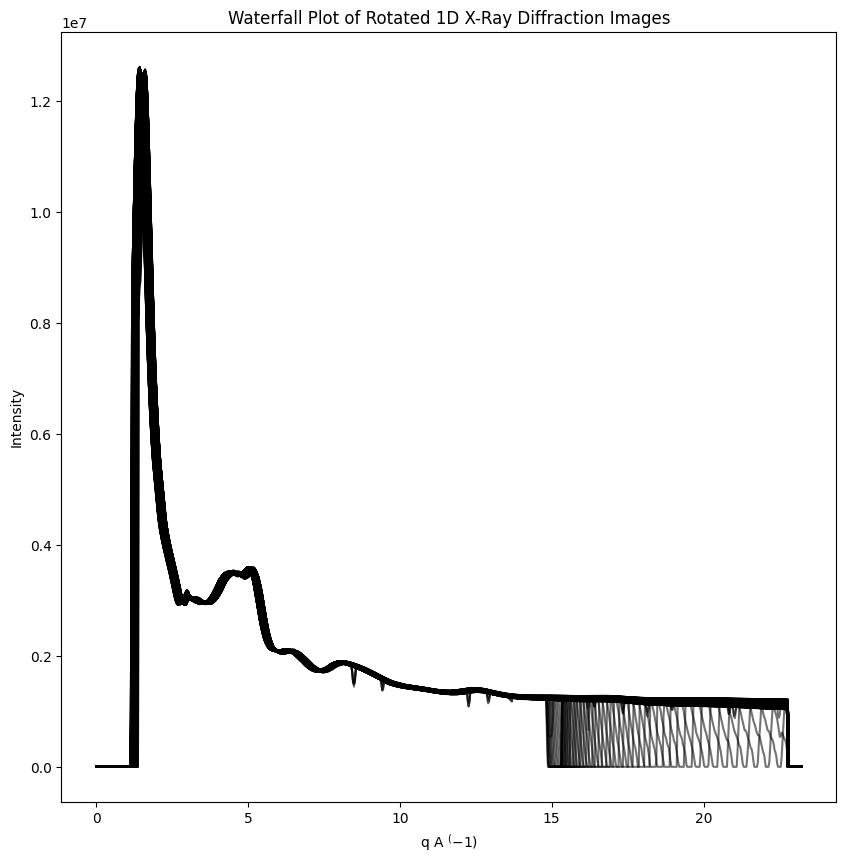

In [5]:
q, cryst_C_GST_SiO2_TM = sim.rotate_and_integrate_printout(tm_circle, 1, .41794313, 1.22224e-11, resolution = 800, mask = mask_12, center = None, visualization_interval = 45)

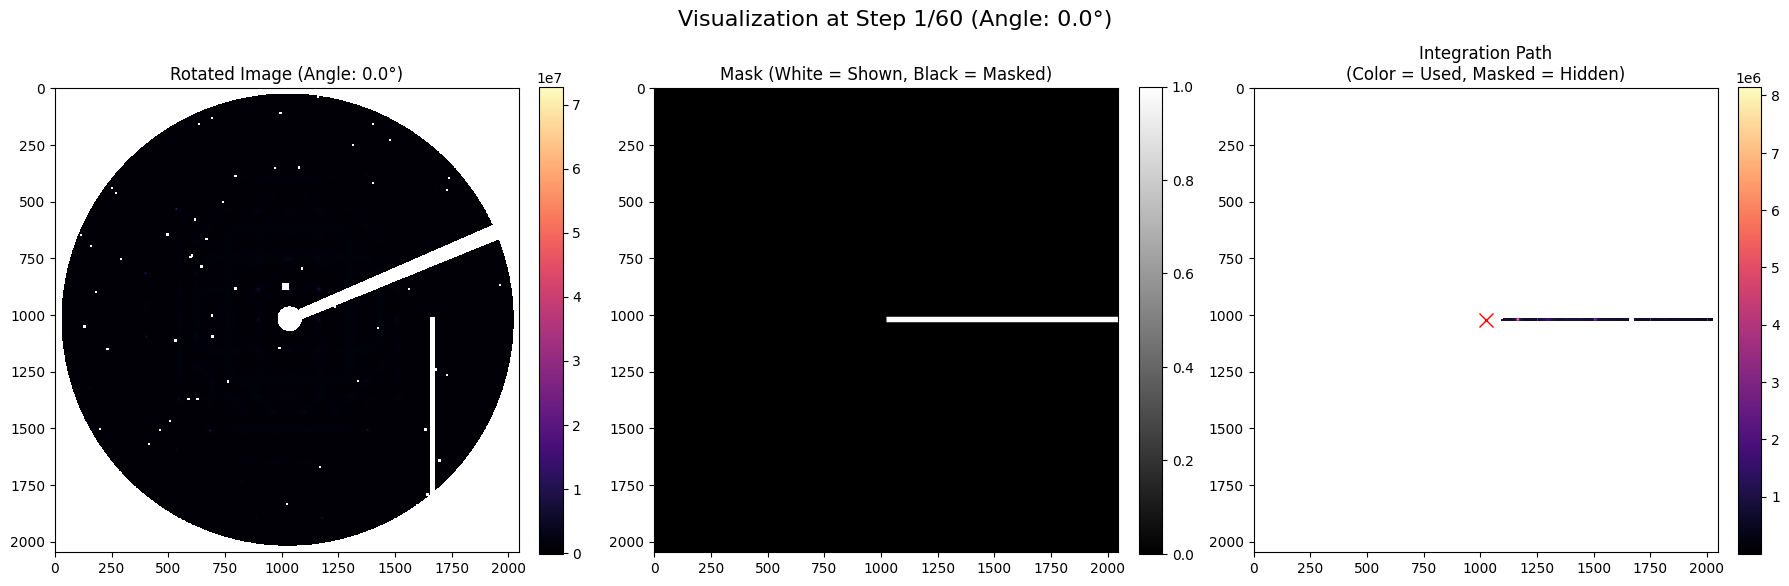

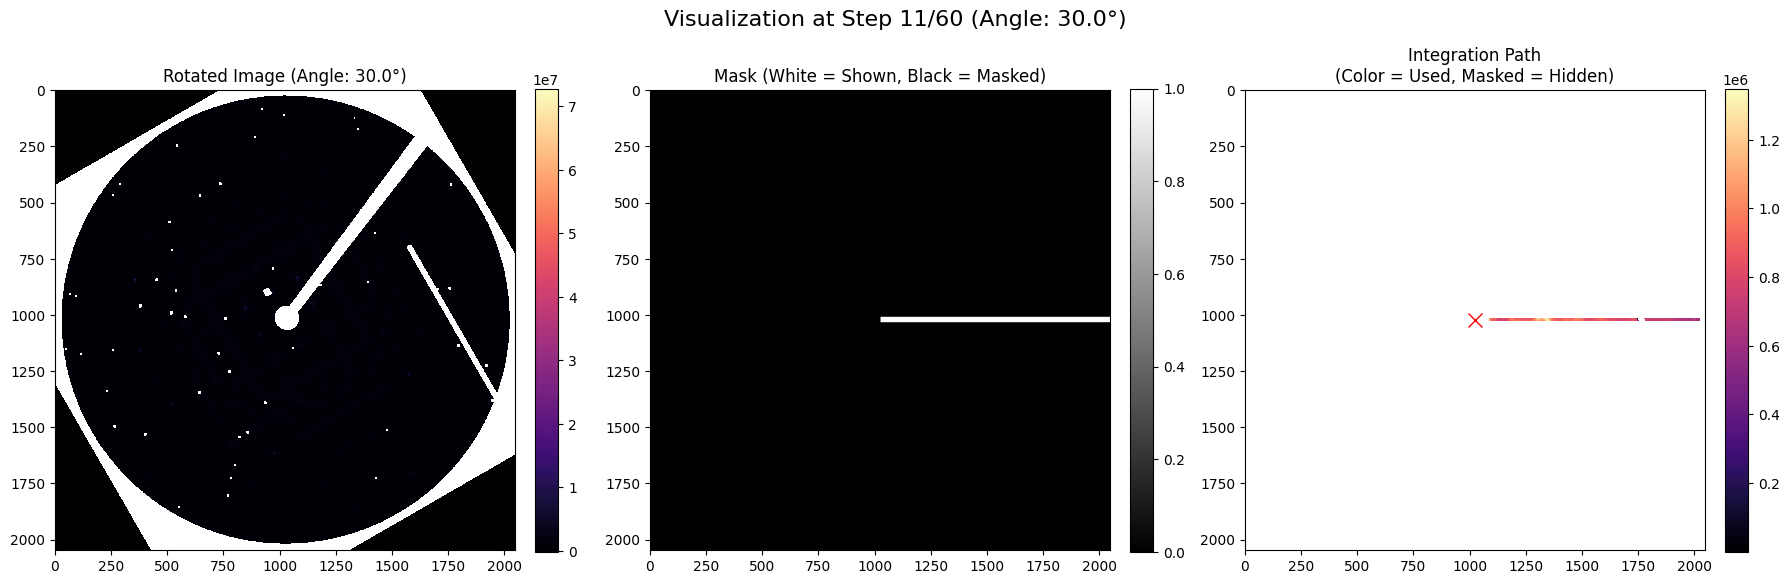

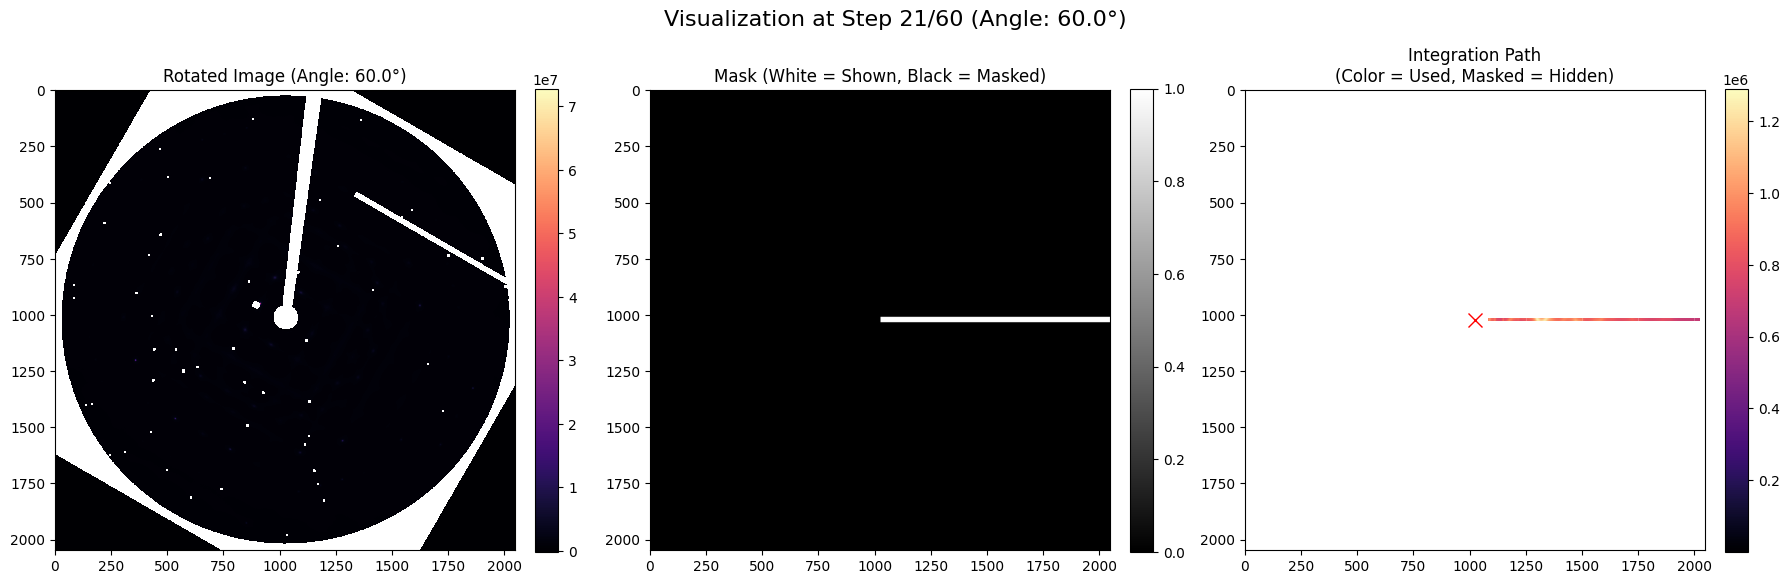

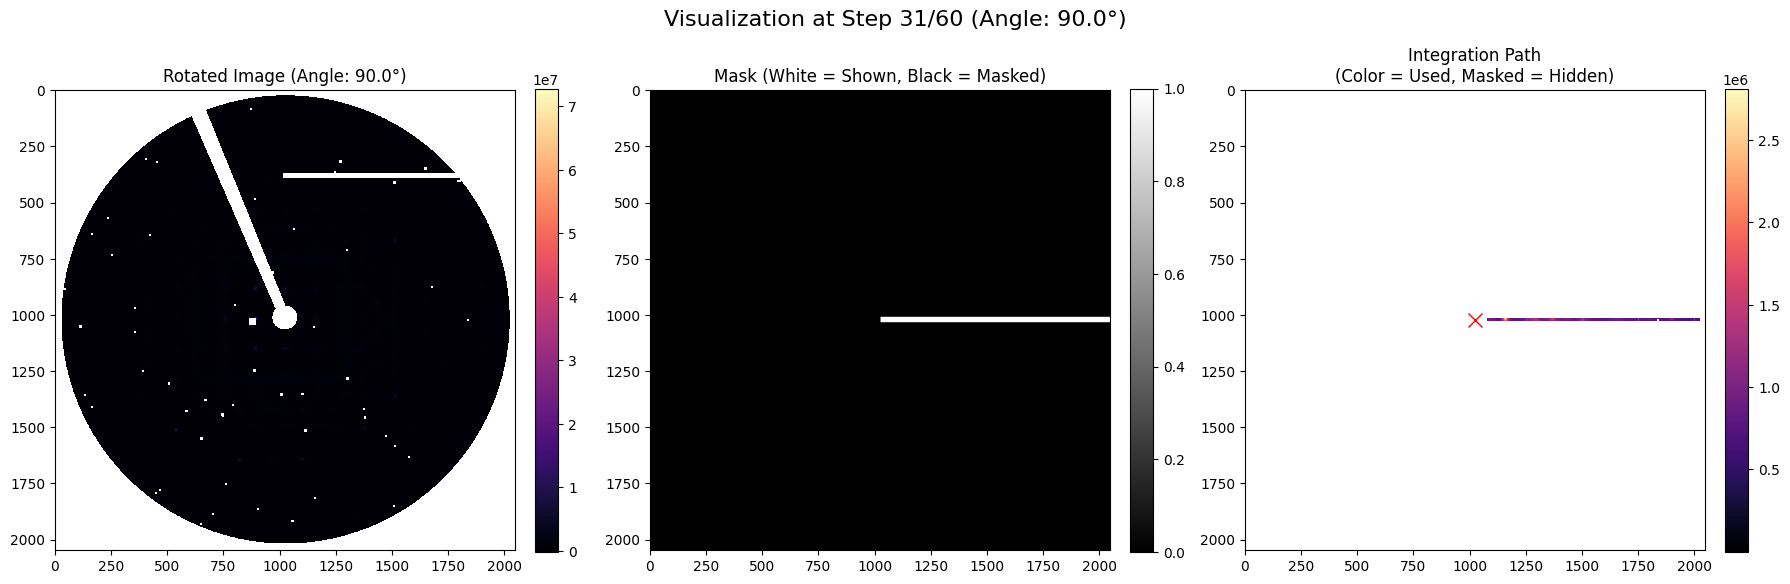

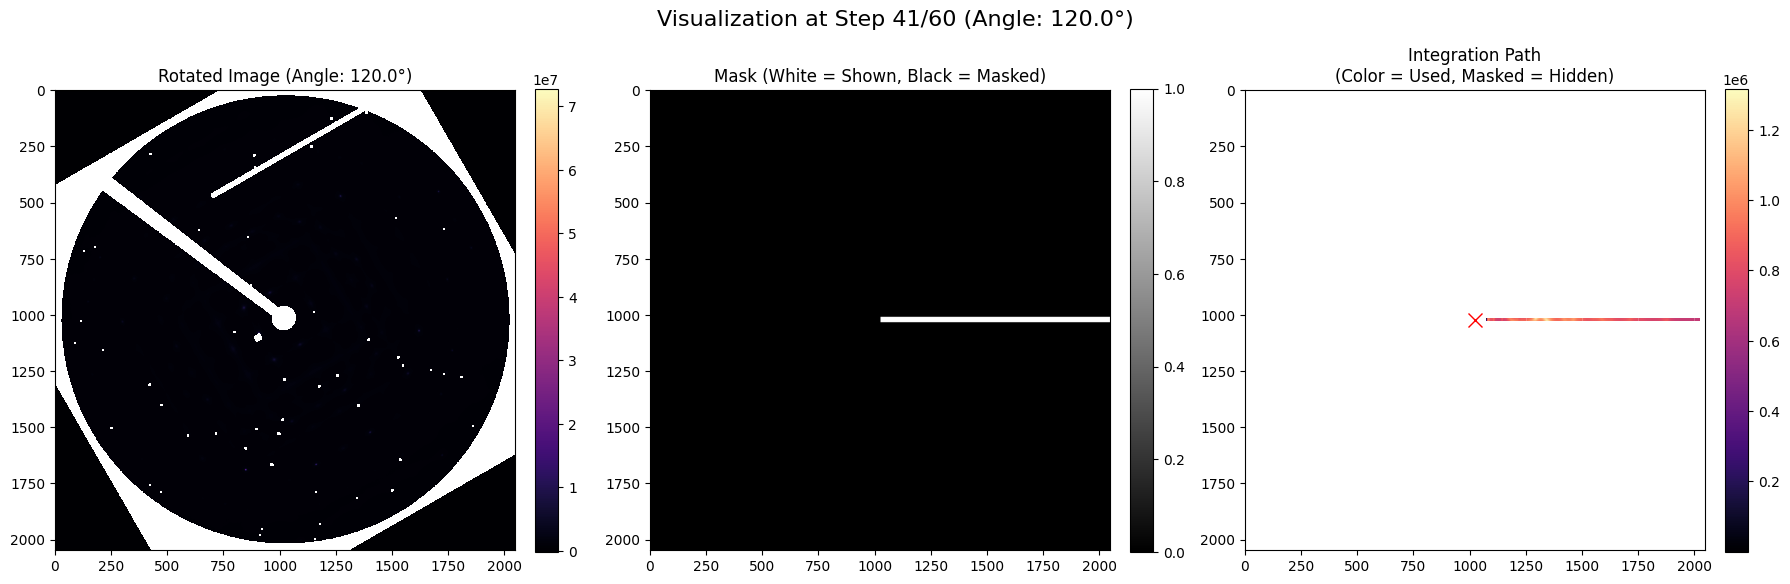

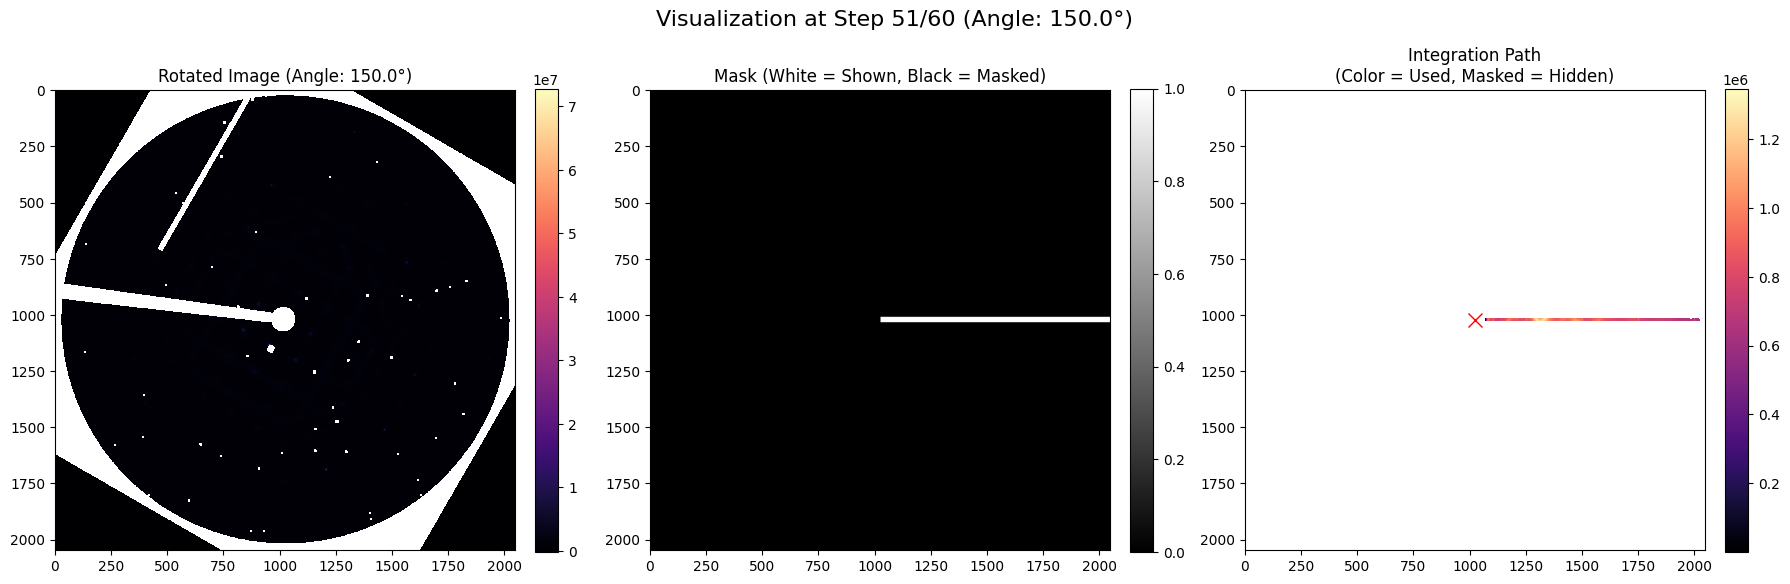

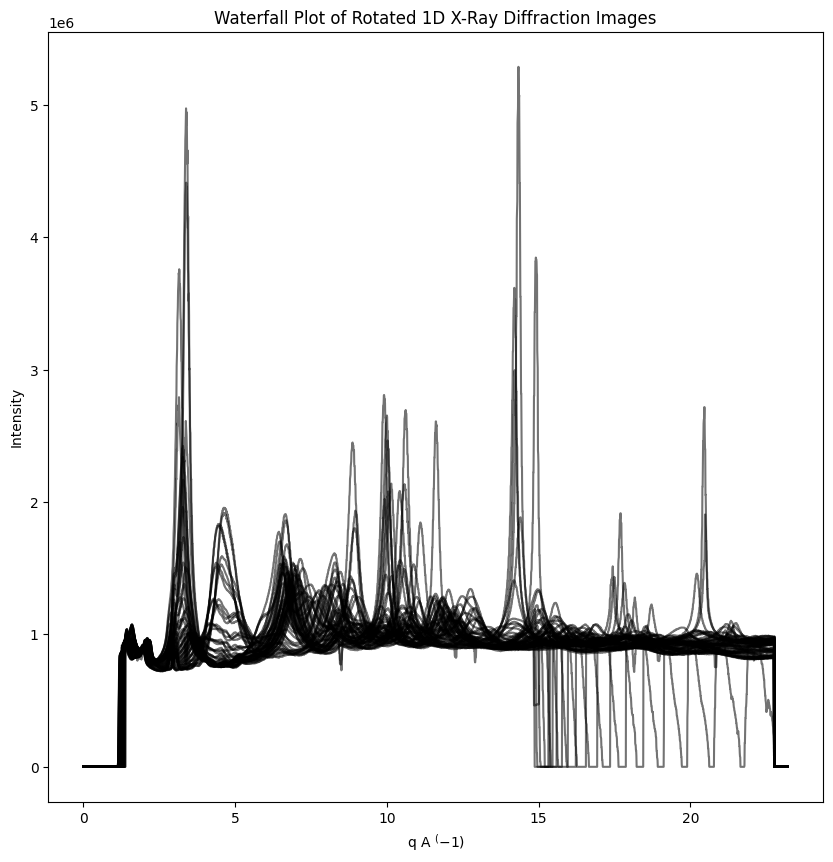

In [6]:
q, cryst_C_GST_Si_TM = sim.rotate_and_integrate_printout(tm_circle_sc, 3, .41794313, 1.22224e-11, resolution = 3000, mask = mask_12, center = None, visualization_interval = 10)

In [7]:
def label_nmf_components(W_matrix, H_matrix, labels=None):
    """
    Label NMF components based on user input or predefined labels.
    
    Parameters:
    - W_matrix: Basis matrix from NMF
    - H_matrix: Coefficient matrix from NMF
    - labels: Optional list of labels for components
    
    Returns:
    - labeled_components: Dictionary with labeled components
    """
    labeled_components = {}
    
    # If no labels provided, prompt user for labels
    if labels is None:
        labels = []
        for i in range(W_matrix.shape[1]):
            plt.figure(figsize=(10, 6))
            plt.plot(W_matrix[:, i], label=f'Component {i+1}')
            plt.title(f'Component {i+1}')
            plt.xlabel('Data Points')
            plt.ylabel('Intensity')
            plt.grid(True)
            plt.show()
            
            label = input(f"Enter label for Component {i+1}: ")
            labels.append(label)
    
    # Store components with their labels
    for i, label in enumerate(labels):
        labeled_components[label] = {
            'basis': W_matrix[:, i],
            'coefficients': H_matrix[i, :]
        }
    
    return labeled_components

In [8]:
def run_sklearn_nmf_with_labeling(data, max_components, max_iter=600, init='random', solver='cd', tol=1e-4, patience=5, n_clusters=5, cluster_matrix='W'):
    """
    Run NMF with labeling step before clustering.
    
    Parameters:
    - data: Input data matrix
    - max_components: Maximum number of components
    - max_iter: Maximum iterations
    - init: Initialization method
    - solver: Solver to use
    - tol: Tolerance
    - patience: Number of runs to wait for error stabilization
    - n_clusters: Number of clusters
    - cluster_matrix: Which matrix to cluster ('W' or 'H')
    
    Returns:
    - labeled_components: Dictionary of labeled components
    - clusters: Cluster assignments
    """
    # Run NMF
    W, H, reconstruction_err = iso.run_sklearn_nmf(data, max_components, max_iter, init, solver, tol, patience)
    
    # Label components
    labeled_components = label_nmf_components(W, H)
    
    # Prepare data for clustering based on user choice
    if cluster_matrix == 'W':
        clustering_data = W
    else:
        clustering_data = H.T
    
    # Perform clustering
    clustering = iso.AgglomerativeClustering(n_clusters=n_clusters)
    clusters = clustering.fit_predict(clustering_data)
    
    # Add cluster assignments to labeled components
    for label, component in labeled_components.items():
        component['cluster'] = clusters[list(labeled_components.keys()).index(label)]
    
    return labeled_components, clusters

Starting NMF algorithm with the following parameters:

Max components: 10
Max iterations: 600
Init: random
Solver: cd
Tolerance: 0.0001
Patience: 5
Random
Random initializers completed
Continuing with best run parameters that are init: nndsvda, solver: cd, tol: 1e-06
Run with 1 components has been completed
Run with 2 components has been completed
Run with 3 components has been completed
Run with 4 components has been completed
Run with 5 components has been completed
Run with 6 components has been completed
Run with 7 components has been completed
Run with 8 components has been completed
Run with 9 components has been completed
Run with 10 components has been completed


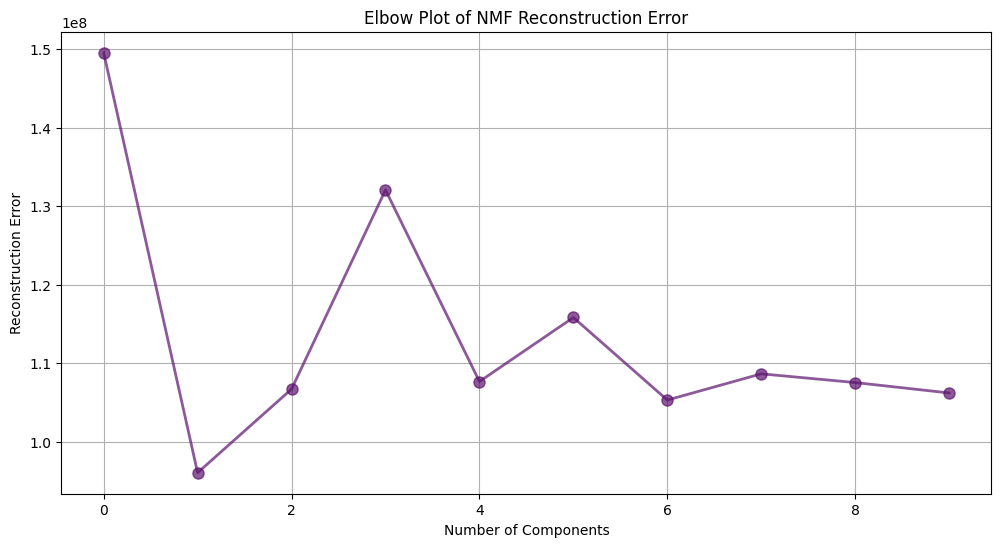

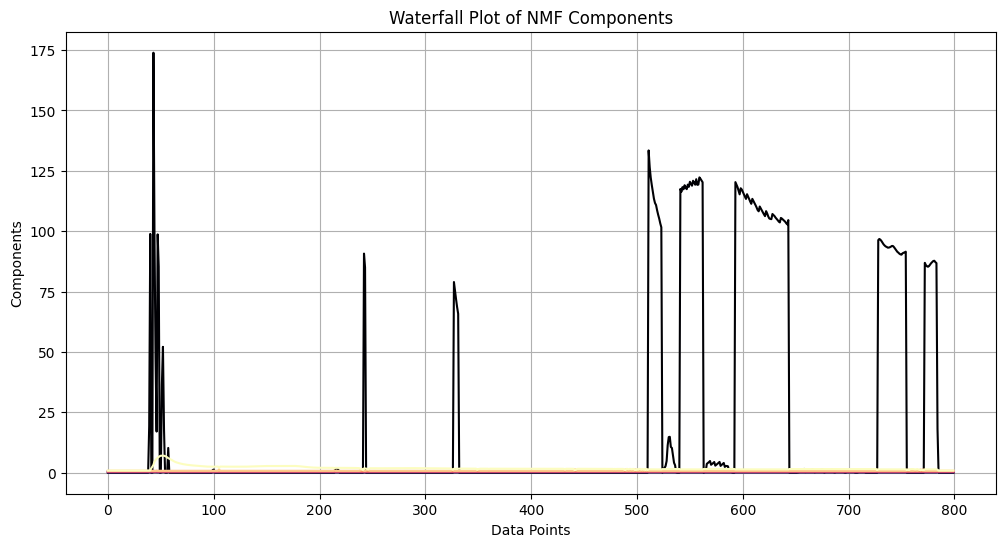

The best number of components is 10


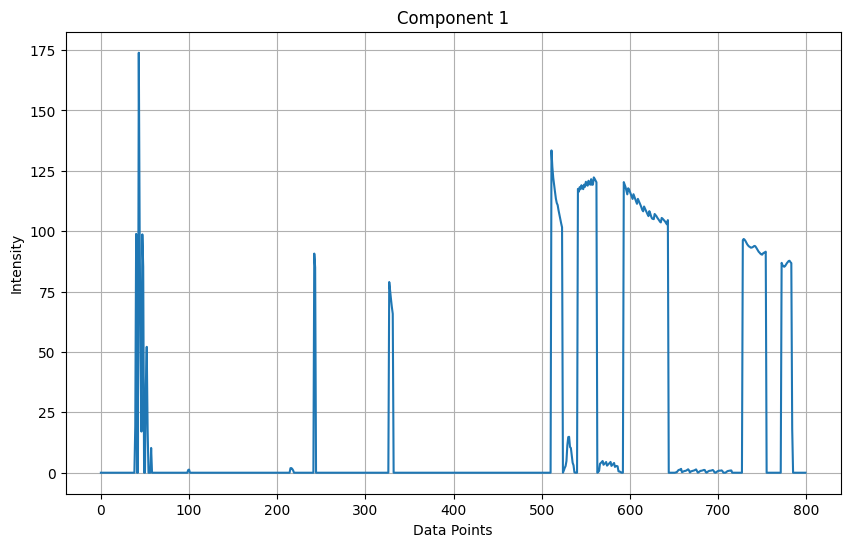

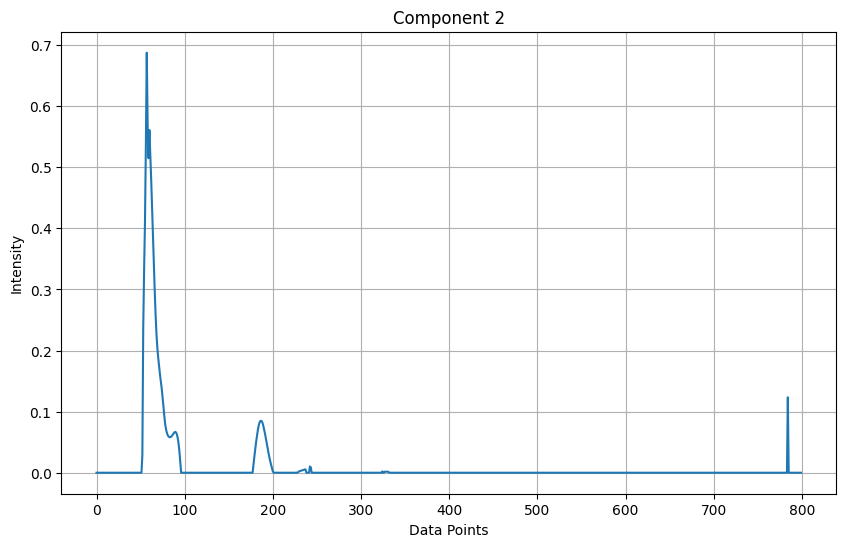

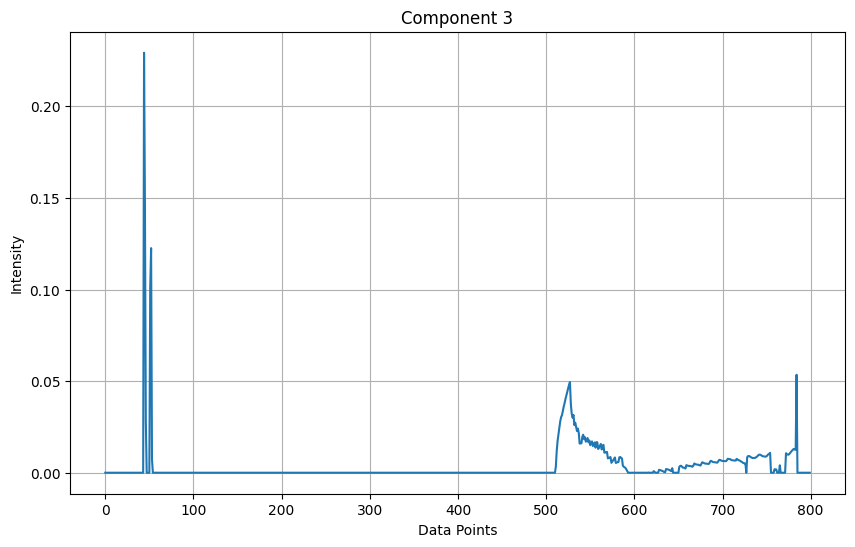

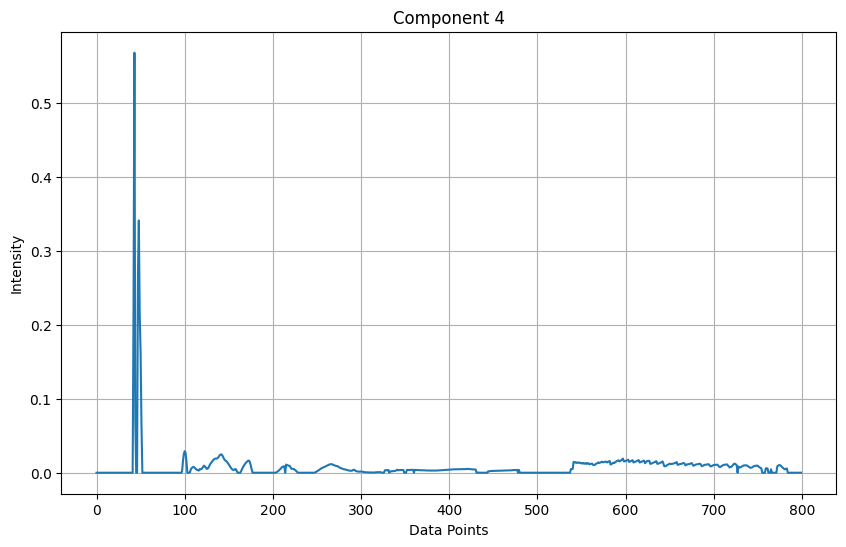

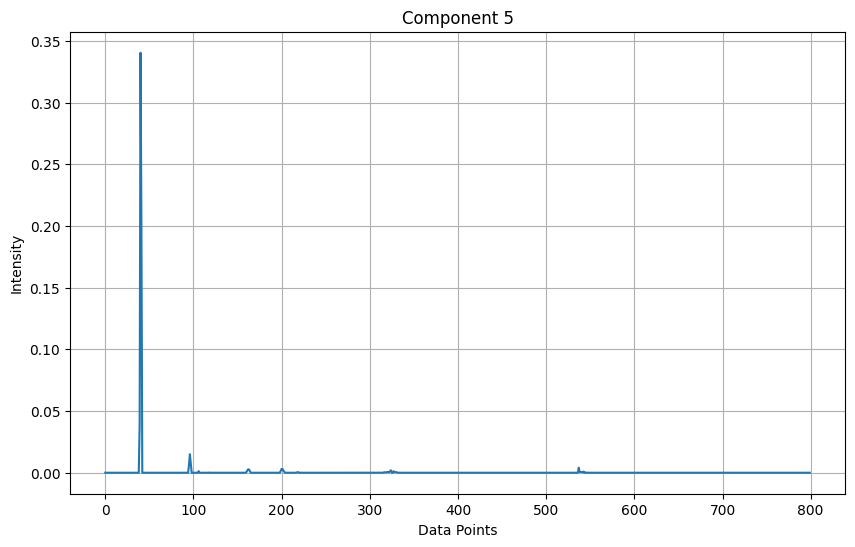

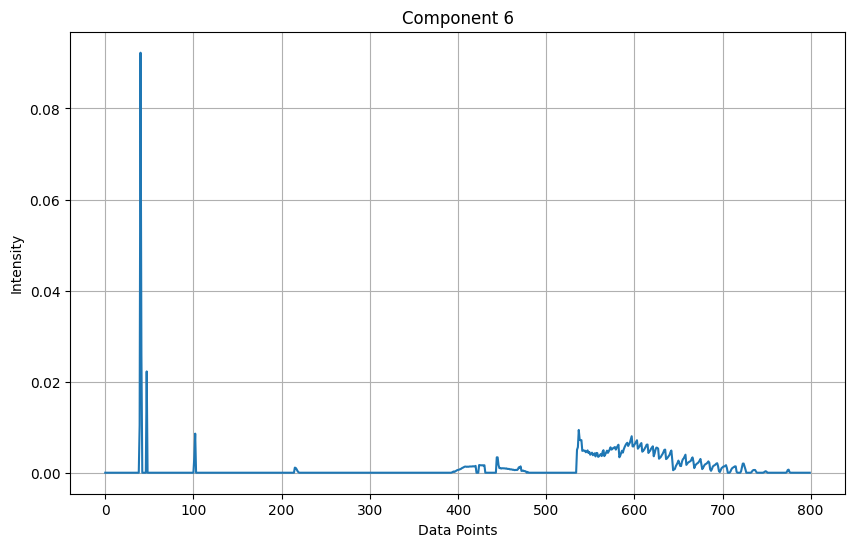

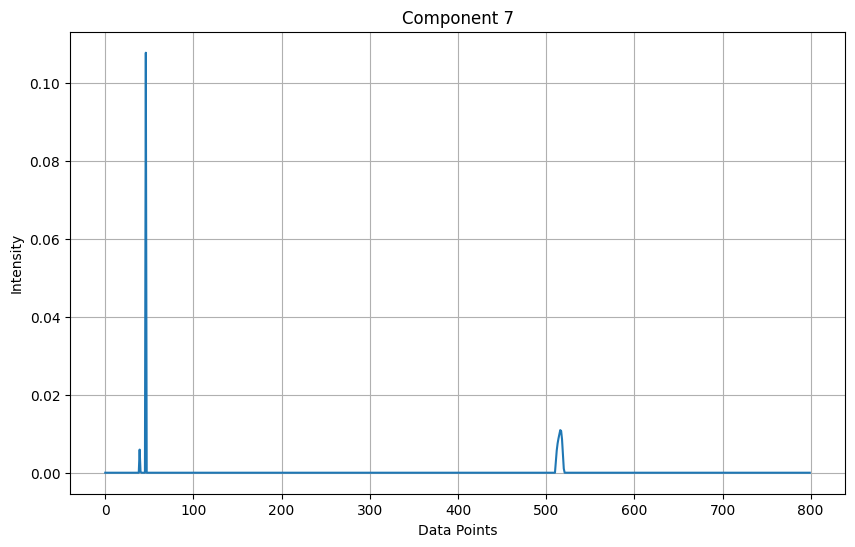

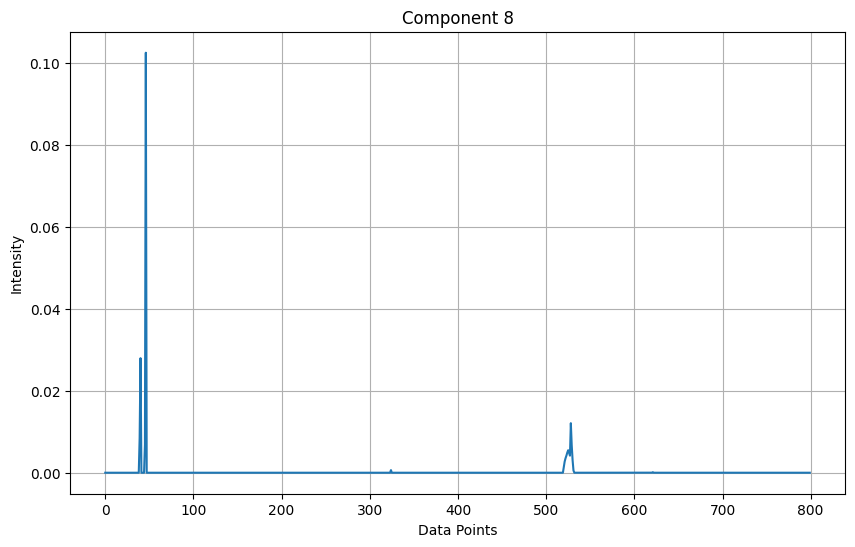

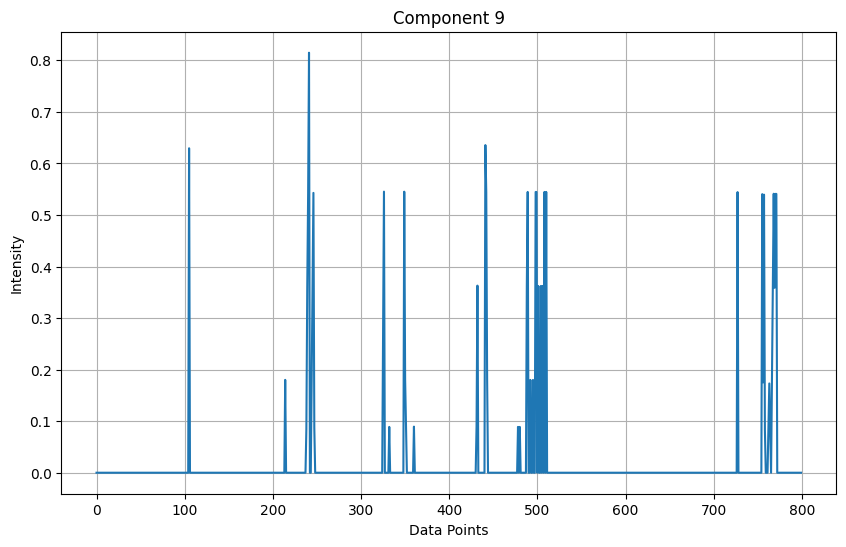

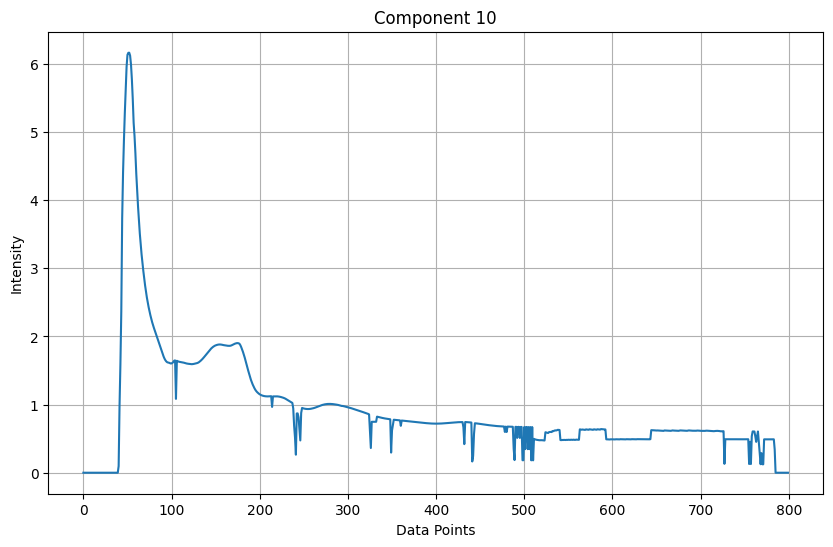

Label: a
Basis shape: (800,)
Coefficients shape: (180,)
Cluster: 1
Label: b
Basis shape: (800,)
Coefficients shape: (180,)
Cluster: 1
Label: c
Basis shape: (800,)
Coefficients shape: (180,)
Cluster: 1
Label: d
Basis shape: (800,)
Coefficients shape: (180,)
Cluster: 1
Label: e
Basis shape: (800,)
Coefficients shape: (180,)
Cluster: 1
Label: f
Basis shape: (800,)
Coefficients shape: (180,)
Cluster: 1
Label: g
Basis shape: (800,)
Coefficients shape: (180,)
Cluster: 1
Label: h
Basis shape: (800,)
Coefficients shape: (180,)
Cluster: 1
Label: i
Basis shape: (800,)
Coefficients shape: (180,)
Cluster: 1
Label: j
Basis shape: (800,)
Coefficients shape: (180,)
Cluster: 1


In [9]:
# Example usage
data_SiO2 = np.array(cryst_C_GST_SiO2_TM)  # Your input data
max_components_SiO2 = 10
n_clusters_SiO2 = 3

# Run the modified workflow
labeled_components, clusters = run_sklearn_nmf_with_labeling(
    data=data_SiO2,
    max_components=max_components_SiO2,
    n_clusters=n_clusters_SiO2
)

# Access labeled components
for label, component in labeled_components.items():
    print(f"Label: {label}")
    print(f"Basis shape: {component['basis'].shape}")
    print(f"Coefficients shape: {component['coefficients'].shape}")
    print(f"Cluster: {component['cluster']}")

Starting NMF algorithm with the following parameters:

Max components: 10
Max iterations: 600
Init: random
Solver: cd
Tolerance: 0.0001
Patience: 5
Random
Random initializers completed
Continuing with best run parameters that are init: nndsvda, solver: mu, tol: 0.0001
Run with 1 components has been completed
Run with 2 components has been completed
Run with 3 components has been completed
Run with 4 components has been completed
Run with 5 components has been completed
Run with 6 components has been completed
Run with 7 components has been completed
Run with 8 components has been completed
Run with 9 components has been completed
Run with 10 components has been completed


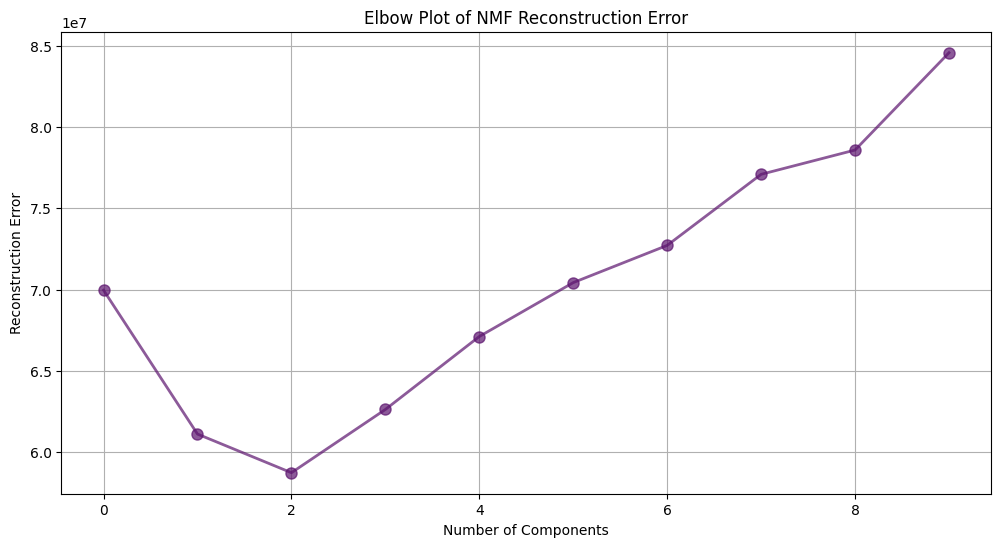

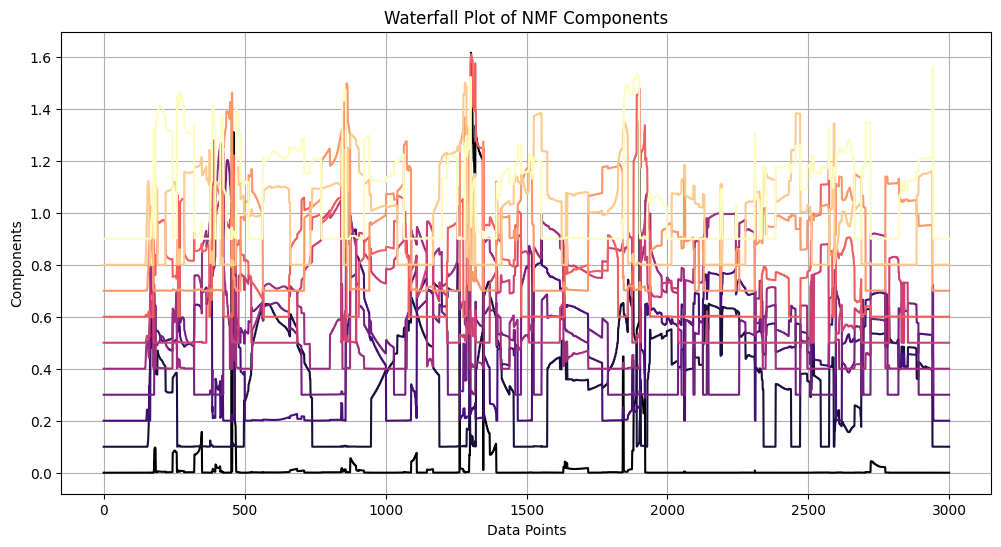

The best number of components is 10


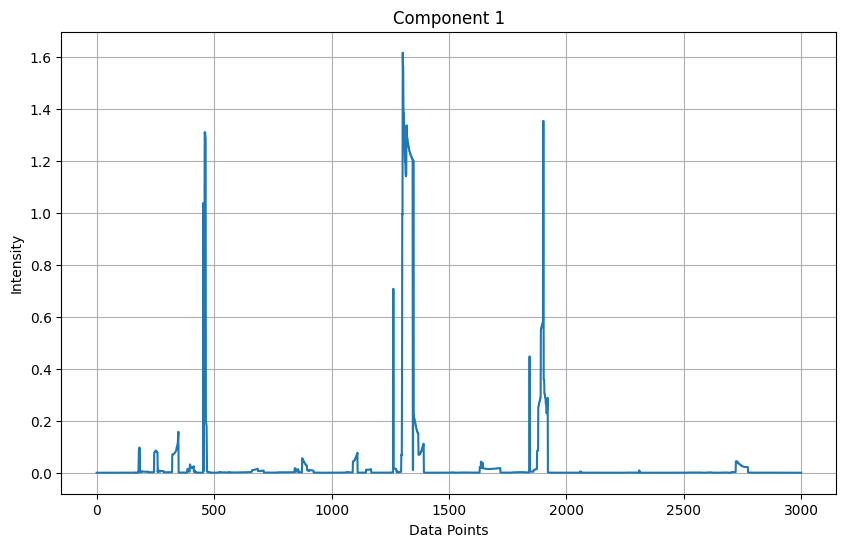

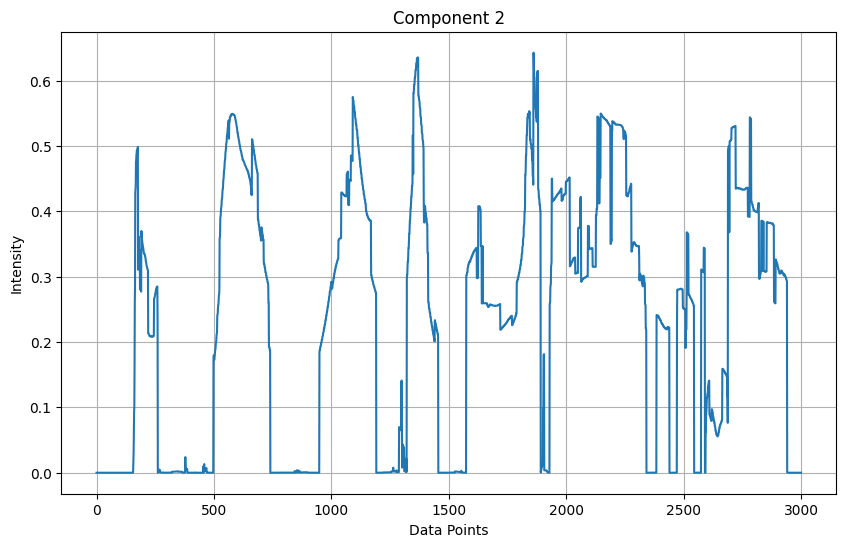

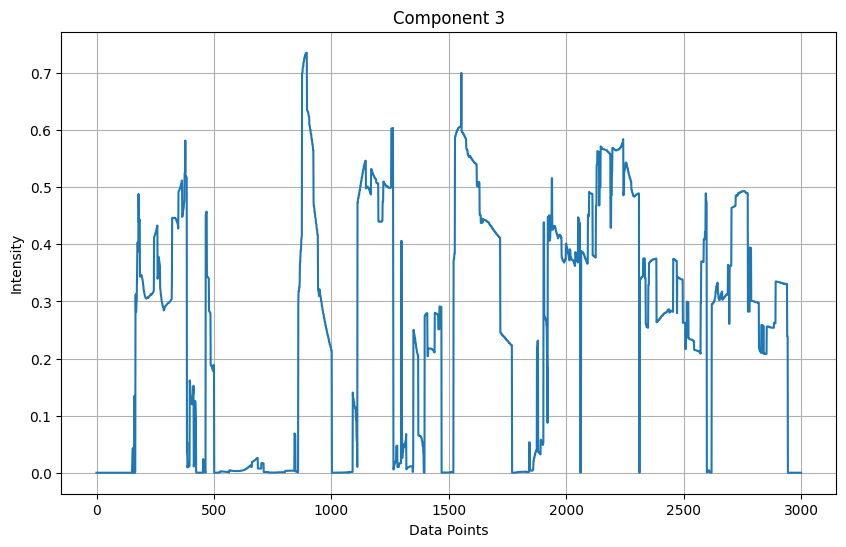

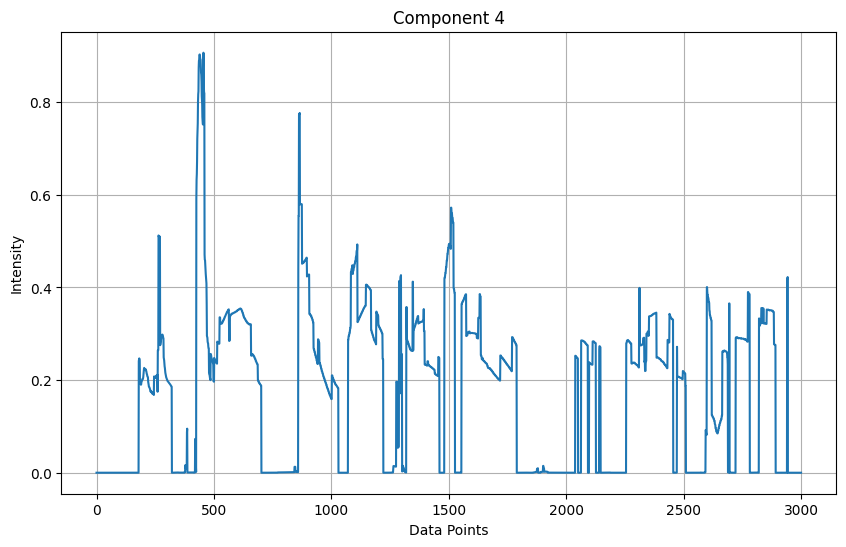

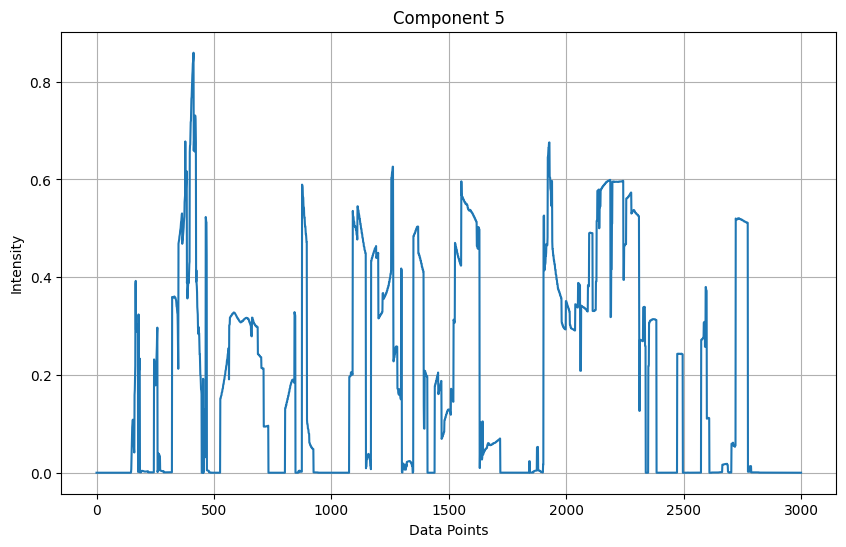

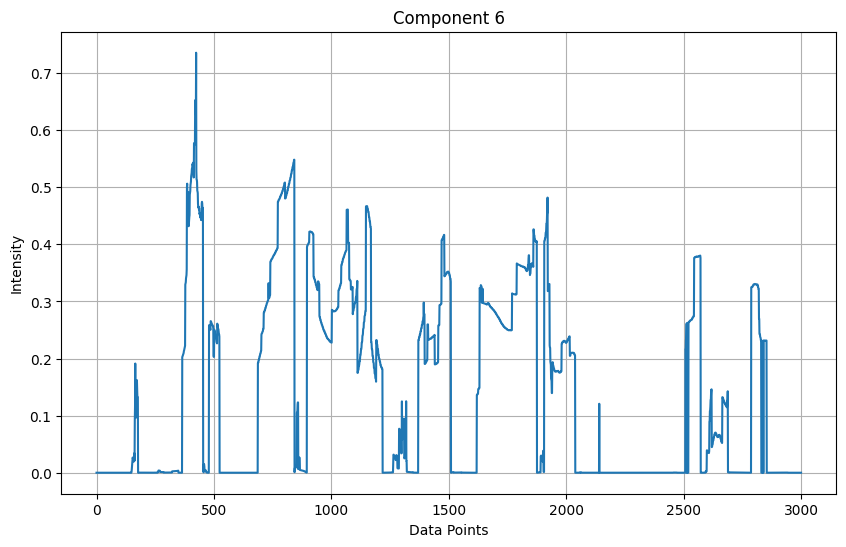

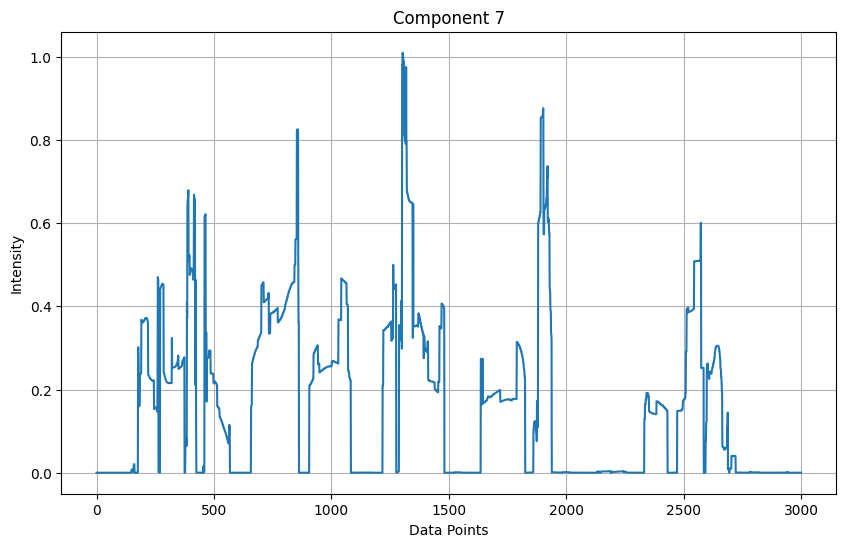

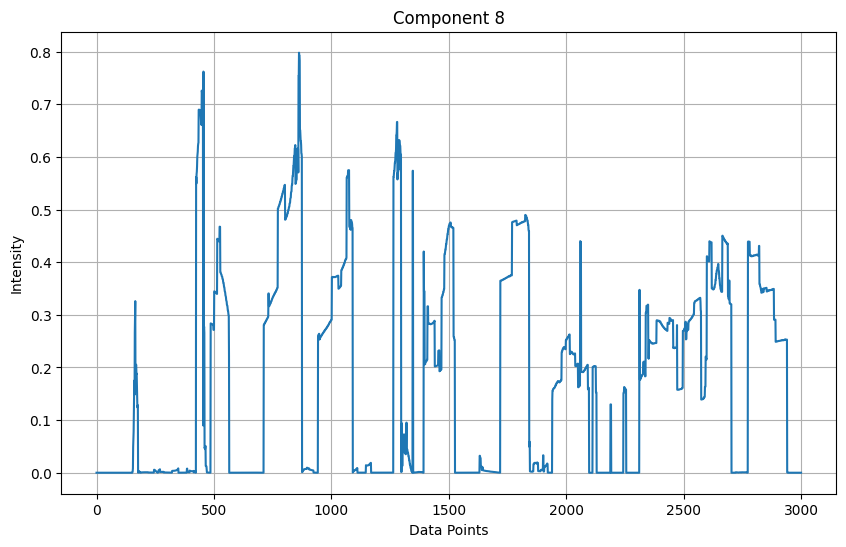

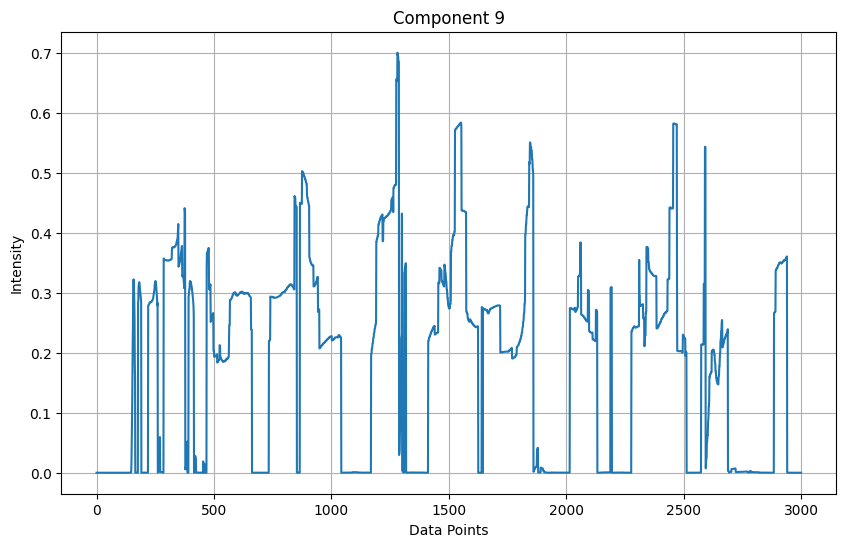

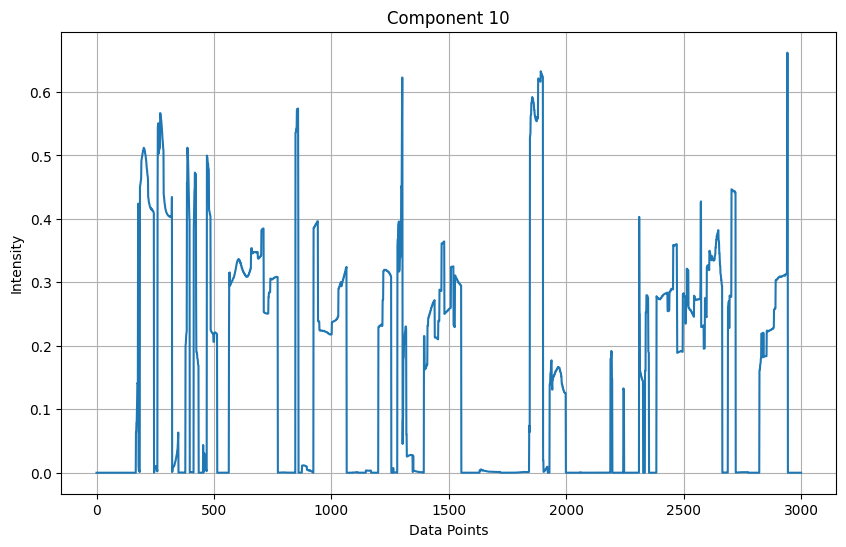

Label: 1
Basis shape: (3000,)
Coefficients shape: (60,)
Cluster: 0
Label: 2
Basis shape: (3000,)
Coefficients shape: (60,)
Cluster: 0
Label: 3
Basis shape: (3000,)
Coefficients shape: (60,)
Cluster: 0
Label: 4
Basis shape: (3000,)
Coefficients shape: (60,)
Cluster: 0
Label: 5
Basis shape: (3000,)
Coefficients shape: (60,)
Cluster: 0
Label: 6
Basis shape: (3000,)
Coefficients shape: (60,)
Cluster: 0
Label: 7
Basis shape: (3000,)
Coefficients shape: (60,)
Cluster: 0
Label: 8
Basis shape: (3000,)
Coefficients shape: (60,)
Cluster: 0
Label: 9
Basis shape: (3000,)
Coefficients shape: (60,)
Cluster: 0
Label: 0
Basis shape: (3000,)
Coefficients shape: (60,)
Cluster: 0


In [10]:
# Example usage
data_Si = np.array(cryst_C_GST_Si_TM)  # Your input data
max_components_Si = 10
n_clusters_Si = 3

# Run the modified workflow
labeled_components, clusters = run_sklearn_nmf_with_labeling(
    data=data_Si,
    max_components=max_components_Si,
    n_clusters=n_clusters_Si
)

# Access labeled components
for label, component in labeled_components.items():
    print(f"Label: {label}")
    print(f"Basis shape: {component['basis'].shape}")
    print(f"Coefficients shape: {component['coefficients'].shape}")
    print(f"Cluster: {component['cluster']}")